### Description:
In this notebook, my goal is to explore count of co-occuring word pairs. <br>

In **Stage 1: Import data**:<br>
I just import processed data I did in notebook **EDA_1_...** which has 4 columns: **FileName**, **Sentence**, 
**Clean sentence**, **Lemmatized**.<br>

In **Stage 2: Count co-occuring word pairs**:<br>
I count co-occuring word pairs and observe using bar chart.

In [2]:
import pandas as pd
from collections import Counter, defaultdict
from itertools import combinations as combs
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, ImageColorGenerator  #STOPWORDS

### Stage 1: Import data

In [3]:
# 1
# Import data
df = pd.read_csv("Processed_data.csv")

# 2
# Remove rows containing NaN
df = df[df['Clean sentence'].notnull()]

# 3
# Check data
print("DF shape:", df.shape)
df.head()

DF shape: (935, 4)


,FileName,Sentence,Clean sentence,Lemmatized
0,doc1.txt,Let me begin by saying thanks to all you who'v...,let me begin thanks traveled far wide brave co...,let i begin thank travel far wide brave cold t...
1,doc1.txt,We all made this journey for a reason.,journey reason,journey reason
2,doc1.txt,"It's humbling, but in my heart I know you didn...",humbling heart i know come me came believe cou...,humble heart i know come i come believe country
3,doc1.txt,"In the face of war, you believe there can be p...",face war believe peace,face war believe peace
4,doc1.txt,"In the face of despair, you believe there can ...",face despair believe hope,face despair believe hope


### Stage 2: Count co-occuring word pairs
For Clean sentence column

In [4]:
# Create pair of co-occuring words in one sentence
co_occurence = defaultdict(lambda: 0)

for row in df.iterrows():
    clean_sent = row[1]["Clean sentence"]
    
    for cmb in combs(clean_sent.split(), 2):
        key_pair = " ".join(sorted(cmb))
        co_occurence[key_pair] += 1

In [5]:
# Count occurence of pairs
pair2freq = Counter(co_occurence).most_common()

# Remove pairs havinf "I" as element (optional, as "I" occures too requent)
# pair2freq = [p for p in pair2freq if "I" not in p[0].split()]

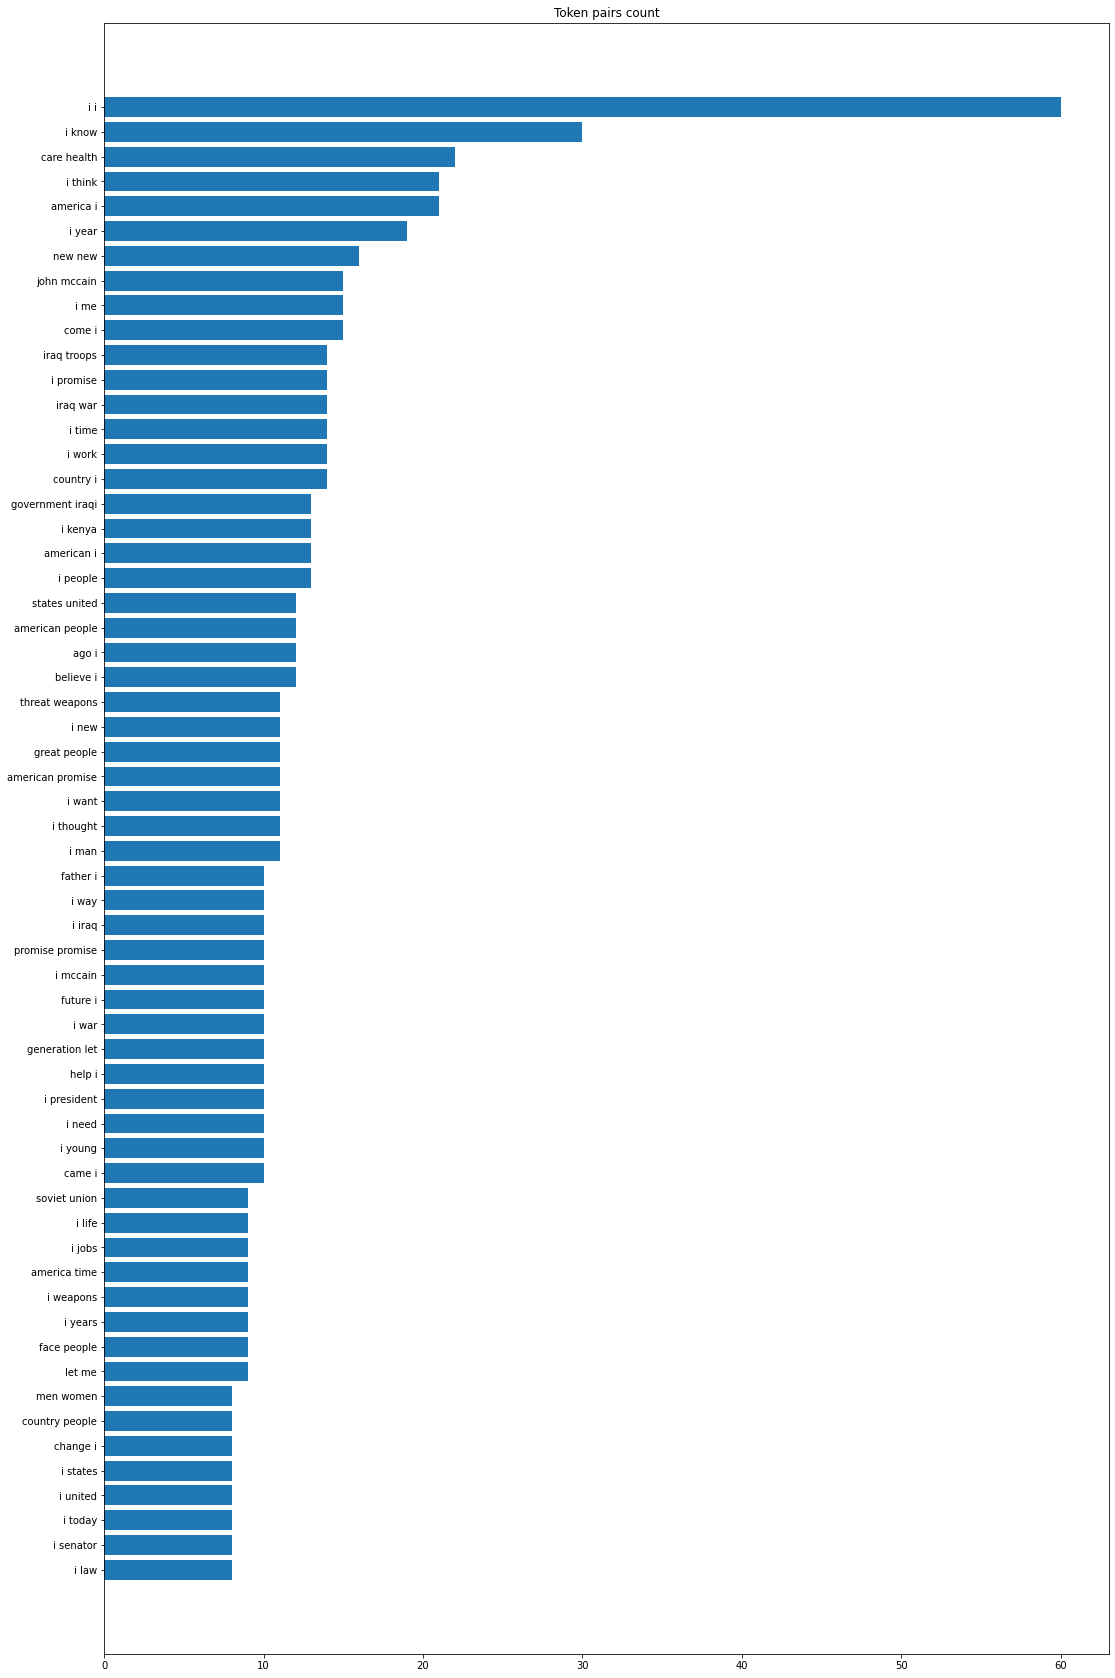

In [6]:
# 6.1
# Get top N common tokens
top = 60
pair2freq = pair2freq[:top]

# Sort
pair2freq = sorted(pair2freq, key=lambda x: x[1], reverse=False)

#
pairs_  = [t for t,c in pair2freq[:top]]
counts_ = [c for t,c in pair2freq[:top]]


# 6.2
# Plot bar chart
y = range(len(pairs_))
plt.figure(figsize=(18,30))           # option to configure chrat size, this line should come first
plt.barh(y, counts_)
plt.title("Token pairs count")
plt.yticks(y, pairs_)
plt.show()